<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#U-default" data-toc-modified-id="U-default-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>U-default</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Sample" data-toc-modified-id="Sample-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sample</a></span></li></ul></li><li><span><a href="#U-default-smoothing-one" data-toc-modified-id="U-default-smoothing-one-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>U-default-smoothing-one</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Sample" data-toc-modified-id="Sample-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sample</a></span></li></ul></li></ul></div>

In [1]:
# Load lib and define helper functions

%reload_ext autoreload
%autoreload 2

In [2]:
from dataloader import *
from trainer import *
import AUCMMS
from fastai.vision.all import *

DATA = '/media/samsung/chexpert/CheXpert-v1.0-small/'

# U-default

In [3]:
data_params={
    'uncertainty_method':'default',
    'use_frontal':False,
    'image_size':224,
    'sample_frac':1,
    'sample_seed':123,
    'batch_size': 128,
#     'use_upsampling': True,
#     'upsampling_cols':['Cardiomegaly'],
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=5

trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:53: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:53: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


## Full dataset

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.421652,0.458725,0.868076,[0.82788149 0.83792523 0.86212875 0.90534979 0.90709626],13:34
1,0.417750,0.469564,0.866336,[0.8679789 0.74065379 0.90592492 0.89429747 0.92282599],13:28
2,0.408842,0.433132,0.884319,[0.84066558 0.8261871 0.92167948 0.90840682 0.92465815],07:42
3,0.403709,0.426248,0.883570,[0.84719968 0.79859142 0.91210614 0.93162845 0.92832246],07:41
4,0.401038,0.422073,0.887063,[0.83952922 0.79974309 0.92665461 0.94191652 0.92747341],07:39


/home/quan/anaconda3/envs/fastai_v2/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Better model found at epoch 0 with roc_auc_score value: 0.8680763047034837.


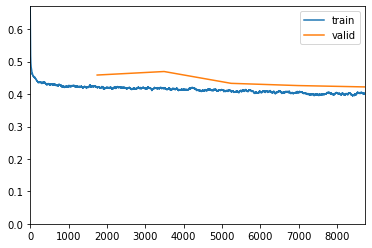

Better model found at epoch 2 with roc_auc_score value: 0.8843194266109663.
Better model found at epoch 4 with roc_auc_score value: 0.8870633695251744.


In [4]:
WEIGHT_NAME='densenet_bce_udefault_fit_mixup'
LR = 3.3e-4
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.4
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.421833,0.460034,0.870006,[0.83299513 0.84381644 0.87328509 0.90311581 0.8968183 ],07:55
1,0.416680,0.455168,0.870925,[0.86116071 0.75646704 0.91791045 0.88906526 0.93002056],07:57
2,0.405222,0.420129,0.884699,[0.82804383 0.81967576 0.91949344 0.92768959 0.92859058],07:51
3,0.401226,0.424308,0.885976,[0.84366883 0.79695252 0.92544852 0.93821282 0.92559657],11:40


/home/quan/anaconda3/envs/fastai_v2/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Better model found at epoch 0 with roc_auc_score value: 0.8700061559461455.


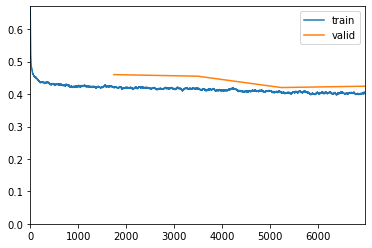

Better model found at epoch 1 with roc_auc_score value: 0.870924803666227.
Better model found at epoch 2 with roc_auc_score value: 0.884698641862314.
Better model found at epoch 3 with roc_auc_score value: 0.885975849232846.


In [4]:
# WEIGHT_NAME='densenet_bce_udefault_fit_mixup'
# LR = 3.3e-4
# model = get_densenet_model(SEED)
# loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
# train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
#                      weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
#                     mixup_alpha=0.4
#                     )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.424509,0.440100,0.864093,[0.72540584 0.84576541 0.91157847 0.91922399 0.91849138],13:34
1,0.415776,0.459458,0.873045,[0.82033279 0.77502658 0.93833861 0.91634333 0.91518456],13:27
2,0.405219,0.437842,0.880581,[0.81428571 0.80421687 0.9262777 0.92792475 0.9301993 ],13:22
3,0.404441,0.429187,0.884753,[0.82775974 0.80851347 0.92801146 0.93209877 0.92738404],13:39


Better model found at epoch 0 with roc_auc_score value: 0.864093018276815.


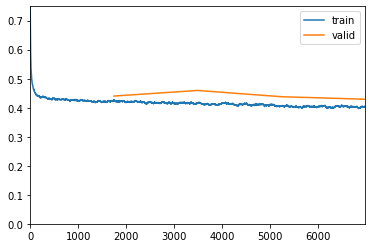

Better model found at epoch 1 with roc_auc_score value: 0.8730451725598126.
Better model found at epoch 2 with roc_auc_score value: 0.8805808674372869.
Better model found at epoch 3 with roc_auc_score value: 0.8847534934151238.


In [5]:
# WEIGHT_NAME='densenet_bce_udefault_fit_mixup'
# LR = 3.3e-4
# model = get_densenet_model(234)
# loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
# train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
#                      weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
#                     mixup_alpha=0.4
#                     )

## Sample

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.446422,0.479408,0.858366,[0.83181102 0.78954991 0.90955882 0.89813988 0.86277174],01:15
1,0.432253,0.454656,0.856774,[0.84020997 0.76398173 0.89292279 0.89613095 0.890625 ],01:13
2,0.418262,0.490995,0.866553,[0.80209974 0.80860071 0.89411765 0.91852679 0.90942029],01:13
3,0.407317,0.480613,0.869221,[0.82257218 0.80921346 0.88180147 0.92485119 0.90766531],01:14


/home/quan/anaconda3/envs/fastai_v2/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Better model found at epoch 0 with roc_auc_score value: 0.858366275621543.


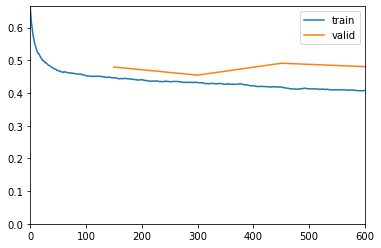

Better model found at epoch 2 with roc_auc_score value: 0.8665530346346936.
Better model found at epoch 3 with roc_auc_score value: 0.8692207211247295.


In [4]:
# # WEIGHT_NAME='densenet_bce_udefault_fit_mixup'
# WEIGHT_NAME='tmp'
# model = get_densenet_model(SEED)
# loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
# train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
#                      weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
#                     mixup_alpha=0.3
#                     )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.438257,0.536282,0.844046,[0.8463474 0.73068746 0.86258103 0.89876543 0.88184824],00:50
1,0.423216,0.465164,0.859822,[0.77098214 0.81143692 0.90479421 0.8984127 0.91348646],00:51
2,0.410006,0.428653,0.864995,[0.81753247 0.78663182 0.88941655 0.9196943 0.91169899],00:53
3,0.394923,0.456568,0.854812,[0.80247565 0.76483877 0.88617518 0.91816578 0.90240415],00:53


Better model found at epoch 0 with roc_auc_score value: 0.8440459136870107.


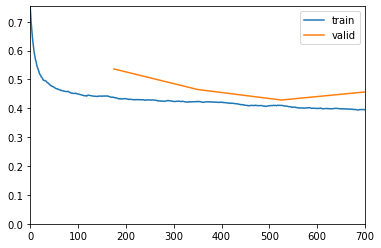

Better model found at epoch 1 with roc_auc_score value: 0.8598224872234894.
Better model found at epoch 2 with roc_auc_score value: 0.8649948260166006.


In [13]:
WEIGHT_NAME='tmp'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.3
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.451932,0.467180,0.872850,[0.8767979 0.84269162 0.87435662 0.90729167 0.86311141],01:13
1,0.437800,0.490741,0.877689,[0.85181102 0.85650624 0.87481618 0.89702381 0.90828804],01:13
2,0.425386,0.498846,0.867964,[0.79270341 0.80804367 0.91378676 0.90409226 0.92119565],01:14
3,0.413995,0.475684,0.876928,[0.81868766 0.82898841 0.90431985 0.91212798 0.9205163 ],01:01


Better model found at epoch 0 with roc_auc_score value: 0.8728498439446115.


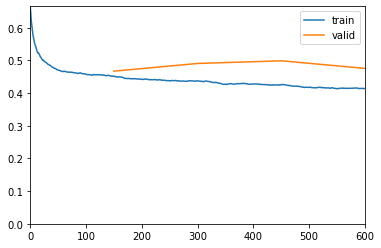

Better model found at epoch 1 with roc_auc_score value: 0.8776890583907772.


In [5]:
# WEIGHT_NAME='tmp'
# model = get_densenet_model(SEED)
# loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
# train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
#                      weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
#                     mixup_alpha=0.4
#                     )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.440783,0.493766,0.843499,[0.79387175 0.79296598 0.8927333 0.86108172 0.87684333],00:54
1,0.429464,0.423431,0.876971,[0.83863636 0.83433735 0.91082466 0.90834803 0.89270712],00:54
2,0.414911,0.488940,0.848325,[0.79228896 0.73099752 0.89605005 0.92345679 0.89882921],00:53
3,0.404738,0.449406,0.863146,[0.79926948 0.76466159 0.90539726 0.93027631 0.91612298],00:53


Better model found at epoch 0 with roc_auc_score value: 0.8434992165814554.


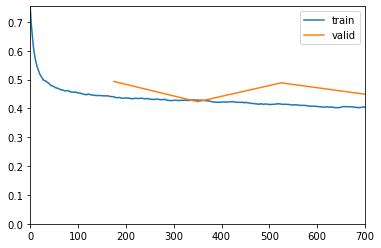

Better model found at epoch 1 with roc_auc_score value: 0.8769707062455024.


In [14]:
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.4
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.454211,0.544650,0.863261,[0.86834646 0.81628788 0.88354779 0.8796875 0.86843297],00:43
1,0.436192,0.507814,0.874927,[0.83154856 0.84998886 0.89108456 0.89791667 0.90409873],00:42
2,0.430057,0.487964,0.858042,[0.75217848 0.80275178 0.89356618 0.921875 0.91983696],00:42
3,0.418867,0.472644,0.877711,[0.80671916 0.83088235 0.90909926 0.91986607 0.92198822],00:42


Better model found at epoch 0 with roc_auc_score value: 0.8632605201225866.


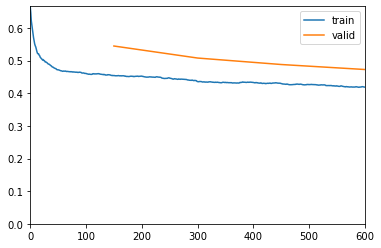

Better model found at epoch 1 with roc_auc_score value: 0.8749274745969471.
Better model found at epoch 3 with roc_auc_score value: 0.8777110147636596.


In [6]:
# WEIGHT_NAME='tmp'
# model = get_densenet_model(SEED)
# loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
# train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
#                      weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
#                     mixup_alpha=0.5
#                     )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.444118,0.502932,0.840111,[0.83080357 0.74955705 0.87486808 0.87107584 0.8742515 ],00:53
1,0.434449,0.419444,0.877212,[0.86083604 0.82459249 0.89951756 0.89294533 0.90816874],00:54
2,0.418669,0.468605,0.854954,[0.81168831 0.75624557 0.89838685 0.90452675 0.9039235 ],00:54
3,0.412278,0.444632,0.862360,[0.82824675 0.76395287 0.89311021 0.91546149 0.91102869],00:54


Better model found at epoch 0 with roc_auc_score value: 0.8401112083473457.


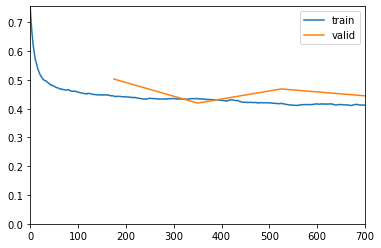

Better model found at epoch 1 with roc_auc_score value: 0.8772120307372753.


In [15]:
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.5
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.441450,0.496780,0.863533,[0.85300325 0.84975195 0.88255691 0.89000588 0.84234516],00:51
1,0.430667,0.486326,0.877110,[0.81749188 0.81923281 0.93826323 0.91352146 0.89704174],00:51
2,0.420853,0.456621,0.863270,[0.81363636 0.80368533 0.87064677 0.91346267 0.91491644],00:50
3,0.406365,0.445714,0.870583,[0.80381494 0.79553508 0.90803558 0.92851264 0.91701671],00:50


Better model found at epoch 0 with roc_auc_score value: 0.8635326294906902.


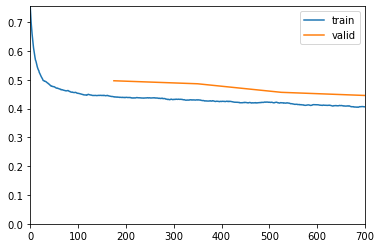

Better model found at epoch 1 with roc_auc_score value: 0.8771102242837685.


In [26]:
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.45
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.440185,0.577806,0.826228,[0.83376623 0.72231573 0.78712498 0.89723692 0.89069622],00:50
1,0.428215,0.462010,0.853805,[0.86761364 0.78109497 0.83175034 0.91087596 0.87769238],00:50
2,0.415535,0.467982,0.836004,[0.74882305 0.76257973 0.86137494 0.90005879 0.90718563],00:50
3,0.405807,0.446545,0.856102,[0.81408279 0.76448441 0.86996834 0.91857731 0.91339709],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8262280174807655.


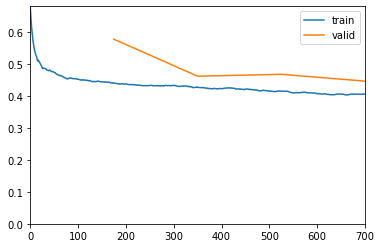

Better model found at epoch 1 with roc_auc_score value: 0.8538054550891868.
Better model found at epoch 3 with roc_auc_score value: 0.8561019868873737.


In [27]:
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.45
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.440424,0.558459,0.838458,[0.79399351 0.78038625 0.85195236 0.88759553 0.87836268],00:49
1,0.428544,0.504997,0.852303,[0.81473214 0.77710843 0.87780793 0.89182834 0.90003575],00:50
2,0.412626,0.456879,0.865066,[0.83851461 0.79052977 0.87924016 0.91428571 0.90276164],00:49
3,0.403698,0.451184,0.862884,[0.82029221 0.7602321 0.89846223 0.92480894 0.91062651],00:49


/home/quan/anaconda3/envs/fastai_v2/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Better model found at epoch 0 with roc_auc_score value: 0.838458065292848.


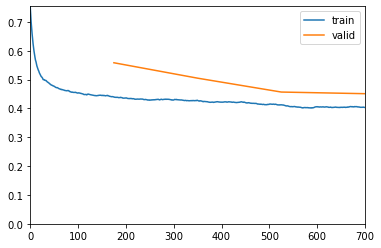

Better model found at epoch 1 with roc_auc_score value: 0.8523025184616655.
Better model found at epoch 2 with roc_auc_score value: 0.8650663789036408.


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.437951,0.622568,0.846420,[0.82077922 0.73724309 0.88594904 0.88071723 0.90740906],00:49
1,0.425727,0.442782,0.874665,[0.8492289 0.85497874 0.87509423 0.90511464 0.88890875],00:50
2,0.415447,0.448355,0.867015,[0.81493506 0.79261162 0.89748229 0.91781305 0.91223523],00:49
3,0.403079,0.440739,0.862035,[0.80535714 0.77259036 0.89567315 0.91922399 0.91732952],00:50


Better model found at epoch 0 with roc_auc_score value: 0.8464195282171018.


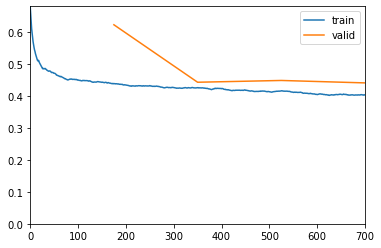

Better model found at epoch 1 with roc_auc_score value: 0.8746650497081113.


In [4]:
WEIGHT_NAME='tmp'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.38
                    )

model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.38
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.441990,0.471747,0.862042,[0.82463474 0.84200035 0.88459219 0.87583774 0.88314416],00:51
1,0.427669,0.493278,0.844622,[0.74496753 0.83274274 0.86695311 0.91263962 0.8658057 ],00:50
2,0.418522,0.447551,0.867890,[0.82301136 0.79323175 0.8989899 0.91940035 0.90481723],00:50
3,0.407895,0.446686,0.870264,[0.82081981 0.79841425 0.8966531 0.92721928 0.90821342],00:50


Better model found at epoch 0 with roc_auc_score value: 0.862041837425482.


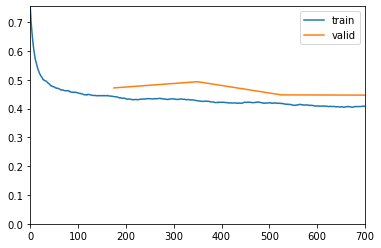

Better model found at epoch 2 with roc_auc_score value: 0.8678901194201419.
Better model found at epoch 3 with roc_auc_score value: 0.8702639710459819.


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.438604,0.561327,0.836596,[0.81810065 0.68687987 0.88210463 0.89223986 0.90365538],00:50
1,0.428868,0.445258,0.848135,[0.79383117 0.79730687 0.85345997 0.89653145 0.8995442 ],00:50
2,0.412167,0.441790,0.877631,[0.83344156 0.79726258 0.91949344 0.91910641 0.91884887],00:50
3,0.406428,0.446283,0.867476,[0.81696429 0.77414068 0.90502035 0.91963551 0.92161945],00:49


Better model found at epoch 0 with roc_auc_score value: 0.8365960769753787.


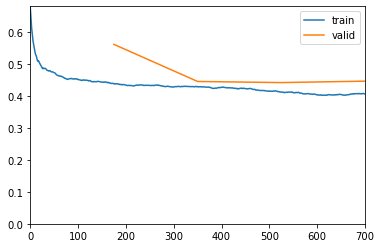

Better model found at epoch 1 with roc_auc_score value: 0.8481347327059783.
Better model found at epoch 2 with roc_auc_score value: 0.8776305714948744.


In [5]:
WEIGHT_NAME='tmp'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.42
                    )

model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.42
                    )

# U-default-smoothing-one

In [7]:
data_params={
    'uncertainty_method':'default-smoothing-one',
    'use_frontal':False,
    'image_size':224,
    'sample_frac':1,
    'sample_seed':123,
    'batch_size': 128,
#     'use_upsampling': True,
#     'upsampling_cols':['Cardiomegaly'],
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=?
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:53: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:53: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


## Full dataset

In [8]:
WEIGHT_NAME='densenet_bce_udefaultsmoothingone_fit_mixup'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.4
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time


KeyboardInterrupt: 

In [ ]:
WEIGHT_NAME='densenet_bce_udefaultsmoothingone_fit_mixup'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.4
                    )

## Sample

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.438209,0.465156,0.869579,[0.86309711 0.86859403 0.86498162 0.884375 0.86684783],00:42
1,0.423485,0.452333,0.847260,[0.81700787 0.76676693 0.84356618 0.91607143 0.89288949],00:43
2,0.409430,0.468225,0.871399,[0.80404199 0.82954545 0.88391544 0.93318452 0.90630661],00:43
3,0.399996,0.485032,0.863557,[0.80057743 0.8166221 0.86709559 0.92678571 0.9067029 ],00:43


Better model found at epoch 0 with roc_auc_score value: 0.8695791170230812.


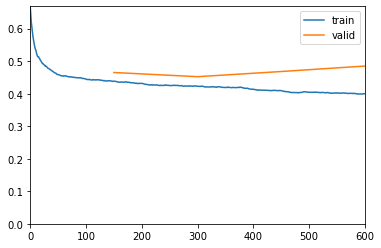

Better model found at epoch 2 with roc_auc_score value: 0.8713988053201891.


In [9]:
# # WEIGHT_NAME='densenet_bce_udefault_fit_mixup'
# WEIGHT_NAME='tmp'
# model = get_densenet_model(SEED)
# loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
# train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
#                      weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
#                     mixup_alpha=0.3
#                     )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.428734,0.498778,0.825331,[0.77390422 0.76962261 0.8432082 0.85784832 0.88207168],00:53
1,0.414404,0.470681,0.860981,[0.80056818 0.81125974 0.90208051 0.8867137 0.90428099],00:53
2,0.401684,0.454605,0.871385,[0.81323052 0.79296598 0.91806121 0.91346267 0.91920636],00:53
3,0.386727,0.461245,0.853138,[0.79650974 0.74202693 0.89695462 0.9186361 0.91156493],00:54


Better model found at epoch 0 with roc_auc_score value: 0.8253310064662374.


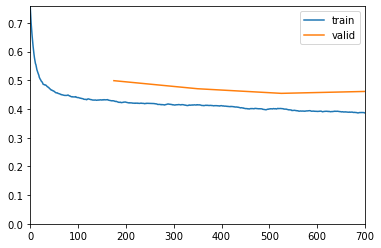

Better model found at epoch 1 with roc_auc_score value: 0.8609806242642397.
Better model found at epoch 2 with roc_auc_score value: 0.87138534851414.


In [18]:
WEIGHT_NAME='tmp'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.3
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.442872,0.565944,0.873137,[0.86010499 0.84486408 0.90818015 0.871875 0.88066123],00:42
1,0.429580,0.471127,0.870031,[0.83375328 0.8438057 0.87977941 0.88407738 0.90874094],00:42
2,0.418218,0.508826,0.863202,[0.78545932 0.80960339 0.90670956 0.90357143 0.91066576],00:42
3,0.407262,0.494783,0.869172,[0.80934383 0.80960339 0.91084559 0.90223214 0.91383605],00:43


Better model found at epoch 0 with roc_auc_score value: 0.8731370895631914.


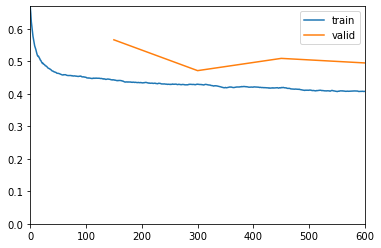

In [10]:
# WEIGHT_NAME='tmp'
# model = get_densenet_model(SEED)
# loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
# train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
#                      weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
#                     mixup_alpha=0.4
#                     )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.430884,0.499872,0.856097,[0.8049513 0.79943303 0.91120157 0.87760141 0.88730003],00:54
1,0.420325,0.428228,0.878691,[0.84545455 0.82503544 0.92816222 0.90258671 0.89221557],00:52
2,0.406243,0.490177,0.840278,[0.78461851 0.72639086 0.89318559 0.90864198 0.88855126],00:52
3,0.397003,0.456838,0.863380,[0.80048701 0.78392984 0.91346299 0.91504997 0.90396818],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8560974661177226.


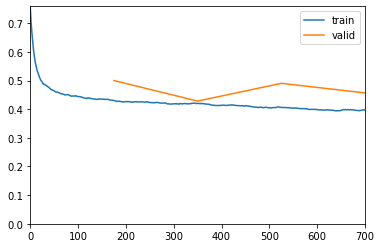

Better model found at epoch 1 with roc_auc_score value: 0.8786908966165464.


In [19]:
WEIGHT_NAME='tmp'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.4
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.445190,0.528797,0.866899,[0.85711286 0.83712121 0.89430147 0.89598214 0.84997736],00:43
1,0.428251,0.512615,0.869324,[0.81616798 0.8355615 0.89981618 0.89233631 0.90274004],00:43
2,0.422172,0.497823,0.859188,[0.79396325 0.81261141 0.86213235 0.91837798 0.90885417],00:43
3,0.411582,0.486080,0.870181,[0.82262467 0.82676025 0.87922794 0.91428571 0.90800498],00:43


Better model found at epoch 0 with roc_auc_score value: 0.8668990083062885.


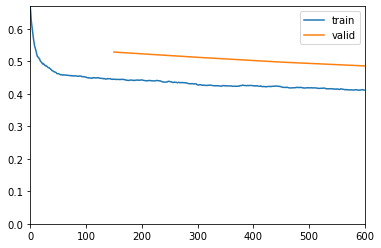

Better model found at epoch 1 with roc_auc_score value: 0.8693243997110219.
Better model found at epoch 3 with roc_auc_score value: 0.870180711763324.


In [11]:
# WEIGHT_NAME='tmp'
# model = get_densenet_model(SEED)
# loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
# train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
#                      weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
#                     mixup_alpha=0.5
#                     )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.434337,0.520200,0.841779,[0.81688312 0.76678774 0.87456656 0.87783657 0.87282152],00:51
1,0.424640,0.444154,0.868764,[0.82516234 0.84107016 0.91376451 0.87701352 0.88680847],00:51
2,0.409384,0.456422,0.859503,[0.79529221 0.79899008 0.90690487 0.89553204 0.90079542],00:51
3,0.404366,0.455256,0.862804,[0.81400162 0.78096208 0.89996985 0.90899471 0.91009027],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8417791010142383.


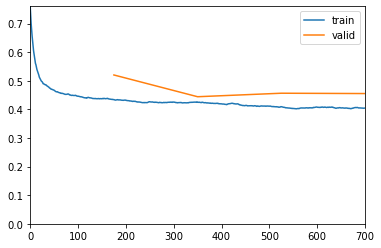

Better model found at epoch 1 with roc_auc_score value: 0.8687638011023451.


In [20]:
WEIGHT_NAME='tmp'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.5
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.432217,0.486233,0.866527,[0.83648539 0.81537916 0.90675411 0.89529688 0.87872017],00:51
1,0.421277,0.474890,0.851840,[0.75771104 0.77746279 0.90554802 0.90964139 0.90883904],00:51
2,0.411046,0.464125,0.870020,[0.83275162 0.82716159 0.86936529 0.89853028 0.92228975],00:51
3,0.398443,0.451994,0.863882,[0.79995942 0.81059532 0.88760742 0.90758377 0.91366521],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8665271434707182.


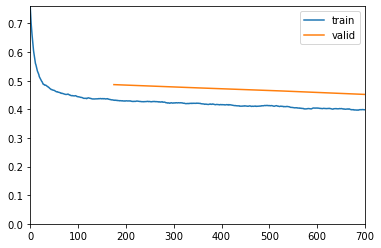

Better model found at epoch 2 with roc_auc_score value: 0.8700197061620344.


In [23]:
WEIGHT_NAME='tmp'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.45
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.430269,0.481990,0.815801,[0.83701299 0.74433026 0.71837781 0.8904174 0.88886406],00:51
1,0.418707,0.464255,0.853409,[0.8362013 0.79495925 0.84652495 0.89964727 0.88971311],00:51
2,0.407110,0.469548,0.846113,[0.74277597 0.77883593 0.90569878 0.89218107 0.91107338],00:51
3,0.397317,0.452538,0.862771,[0.81919643 0.7713944 0.90645259 0.90194004 0.91487175],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8158005043231714.


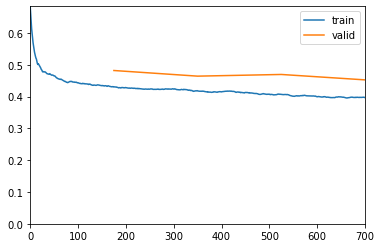

Better model found at epoch 1 with roc_auc_score value: 0.8534091751737579.
Better model found at epoch 3 with roc_auc_score value: 0.8627710399150086.


In [24]:
WEIGHT_NAME='tmp'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.45
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.440424,0.558459,0.838458,[0.79399351 0.78038625 0.85195236 0.88759553 0.87836268],00:49
1,0.428544,0.504997,0.852303,[0.81473214 0.77710843 0.87780793 0.89182834 0.90003575],00:49
2,0.412626,0.456879,0.865066,[0.83851461 0.79052977 0.87924016 0.91428571 0.90276164],00:50
3,0.403698,0.451184,0.862884,[0.82029221 0.7602321 0.89846223 0.92480894 0.91062651],00:50


Better model found at epoch 0 with roc_auc_score value: 0.838458065292848.


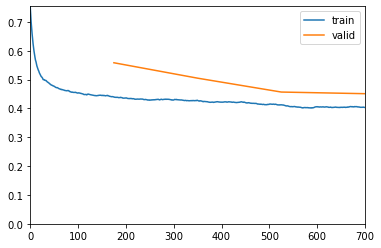

Better model found at epoch 1 with roc_auc_score value: 0.8523025184616655.
Better model found at epoch 2 with roc_auc_score value: 0.8650663789036408.


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.437951,0.622568,0.846420,[0.82077922 0.73724309 0.88594904 0.88071723 0.90740906],00:50
1,0.425727,0.442782,0.874665,[0.8492289 0.85497874 0.87509423 0.90511464 0.88890875],00:50
2,0.415447,0.448355,0.867015,[0.81493506 0.79261162 0.89748229 0.91781305 0.91223523],00:50
3,0.403079,0.440739,0.862035,[0.80535714 0.77259036 0.89567315 0.91922399 0.91732952],00:49


Better model found at epoch 0 with roc_auc_score value: 0.8464195282171018.


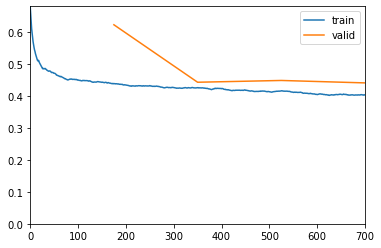

Better model found at epoch 1 with roc_auc_score value: 0.8746650497081113.


In [7]:
WEIGHT_NAME='tmp'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.38
                    )

model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.38
                    )

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.441990,0.471747,0.862042,[0.82463474 0.84200035 0.88459219 0.87583774 0.88314416],00:49
1,0.427669,0.493278,0.844622,[0.74496753 0.83274274 0.86695311 0.91263962 0.8658057 ],00:49
2,0.418522,0.447551,0.867890,[0.82301136 0.79323175 0.8989899 0.91940035 0.90481723],00:51
3,0.407895,0.446686,0.870264,[0.82081981 0.79841425 0.8966531 0.92721928 0.90821342],00:50


Better model found at epoch 0 with roc_auc_score value: 0.862041837425482.


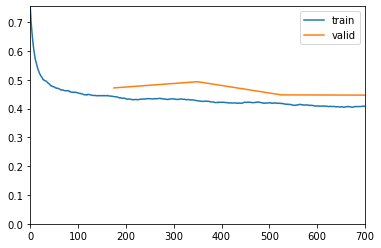

Better model found at epoch 2 with roc_auc_score value: 0.8678901194201419.
Better model found at epoch 3 with roc_auc_score value: 0.8702639710459819.


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.438604,0.561327,0.836596,[0.81810065 0.68687987 0.88210463 0.89223986 0.90365538],00:50
1,0.428868,0.445258,0.848135,[0.79383117 0.79730687 0.85345997 0.89653145 0.8995442 ],00:50
2,0.412167,0.441790,0.877631,[0.83344156 0.79726258 0.91949344 0.91910641 0.91884887],00:49
3,0.406428,0.446283,0.867476,[0.81696429 0.77414068 0.90502035 0.91963551 0.92161945],00:51


Better model found at epoch 0 with roc_auc_score value: 0.8365960769753787.


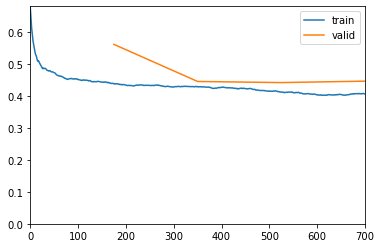

Better model found at epoch 1 with roc_auc_score value: 0.8481347327059783.
Better model found at epoch 2 with roc_auc_score value: 0.8776305714948744.


In [8]:
WEIGHT_NAME='tmp'
model = get_densenet_model(234)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.42
                    )

model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,
                     weight_name=WEIGHT_NAME,lr_scheduler='flat_cos',
                    mixup_alpha=0.42
                    )